## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output = "pandas")

import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,year,country,precipitation,AvMeanSurAirTemp,AvMaxSurAirTemp,AvMinSurAirTemp,incidence,longitude,latitude,group
0,2000,Congo,1644.79,24.49,29.03,19.99,353.41557,15.827659,-0.228021,high incidence
1,2001,Congo,1516.01,24.68,29.22,20.19,350.93625,15.827659,-0.228021,high incidence
2,2002,Congo,1717.96,24.76,29.30,20.26,321.67402,15.827659,-0.228021,high incidence
3,2003,Congo,1573.98,24.73,29.27,20.23,319.21132,15.827659,-0.228021,high incidence
4,2004,Congo,1507.59,24.83,29.37,20.33,317.81208,15.827659,-0.228021,high incidence


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['incidence', 'group'],axis=1)

In [5]:
X.head()

,year,country,precipitation,AvMeanSurAirTemp,AvMaxSurAirTemp,AvMinSurAirTemp,longitude,latitude
0,2000,Congo,1644.79,24.49,29.03,19.99,15.827659,-0.228021
1,2001,Congo,1516.01,24.68,29.22,20.19,15.827659,-0.228021
2,2002,Congo,1717.96,24.76,29.30,20.26,15.827659,-0.228021
3,2003,Congo,1573.98,24.73,29.27,20.23,15.827659,-0.228021
4,2004,Congo,1507.59,24.83,29.37,20.33,15.827659,-0.228021


In [6]:
y1 = df['incidence']
y2 = df["group"]

In [7]:
y1

0       353.41557
1       350.93625
2       321.67402
3       319.21132
4       317.81208
          ...    
2063      0.38608
2064      0.27837
2065      0.18801
2066      0.09468
2067      0.11231
Name: incidence, Length: 2068, dtype: float64

In [8]:
y2

0       high incidence
1       high incidence
2       high incidence
3       high incidence
4       high incidence
             ...      
2063     low incidence
2064     low incidence
2065     low incidence
2066     low incidence
2067     low incidence
Name: group, Length: 2068, dtype: object

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
num_pipeline= Pipeline(
    steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
    ]
)
cat_pipeline=Pipeline(
    steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder",OneHotEncoder(sparse_output = False)),
    ("scaler",StandardScaler(with_mean=False))
    ]
)
preprocessor=ColumnTransformer(
    [
    ("num_pipeline",num_pipeline,num_features),
    ("cat_pipelines",cat_pipeline,cat_features)
    ]
)
X = preprocessor.fit_transform(X)

## Regression

In [10]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y1,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1654, 104), (414, 104))

#### Create an Evaluate Function to give all metrics after model Training

In [11]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 89.9354
- Mean Absolute Error: 63.7017
- R2 Score: 0.6675
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 98.7167
- Mean Absolute Error: 69.5517
- R2 Score: 0.5930


Lasso
Model performance for Training set
- Root Mean Squared Error: 48.6382
- Mean Absolute Error: 31.3778
- R2 Score: 0.9027
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 43.8692
- Mean Absolute Error: 30.5788
- R2 Score: 0.9196


Ridge
Model performance for Training set
- Root Mean Squared Error: 47.5788
- Mean Absolute Error: 30.5469
- R2 Score: 0.9069
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 43.1201
- Mean Absolute Error: 30.4460
- R2 Score: 0.9223


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 18.9474
- Mean Absolute Error: 7.9042
- R2 Score: 0.9852
----------

### Results

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.977423
3,K-Neighbors Regressor,0.974095
6,XGBRegressor,0.973886
5,Random Forest Regressor,0.966353
4,Decision Tree,0.963442
2,Ridge,0.922340
1,Lasso,0.919619
8,AdaBoost Regressor,0.621206
0,Linear Regression,0.592978


## CatBoosting Regressor

In [14]:
catboostmodel = CatBoostRegressor(verbose=False)
catboostmodel = catboostmodel.fit(X_train, y_train)
y_pred = catboostmodel.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 97.74


### Plot y_pred and y_test

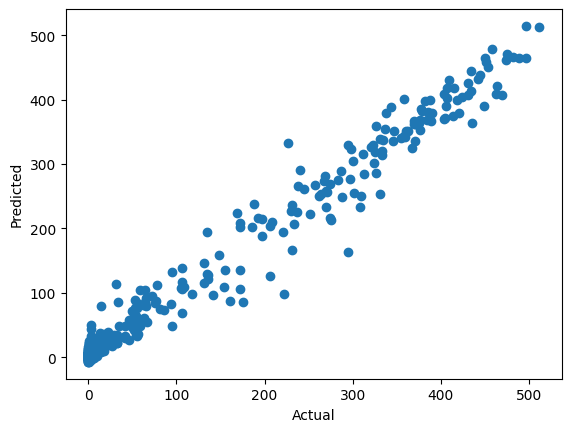

In [15]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

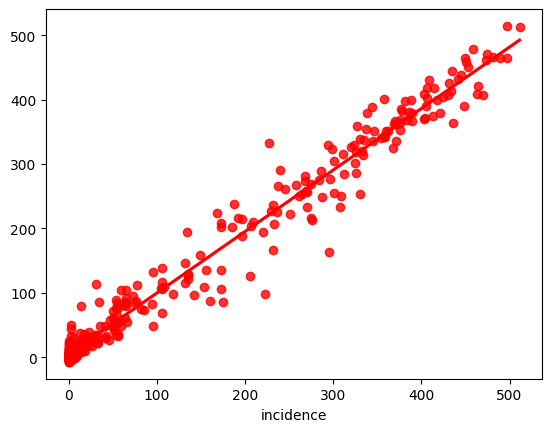

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [17]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1956,142.09077,96.931326,45.159444
69,474.50930,471.550083,2.959217
1568,0.78262,16.639217,-15.856597
1630,0.00000,-6.589303,6.589303
2060,0.48590,2.880385,-2.394485
...,...,...,...
2020,359.09174,342.833341,16.258399
1801,0.09725,6.346420,-6.249170
1626,0.00000,-4.069746,4.069746
1995,0.19473,-0.063636,0.258366


## Classification

In [18]:
classes = y2.unique()
labeler = LabelEncoder()
y2 = labeler.fit_transform(y2)
reverse_encode = {labeler.transform([value])[0]:value for value in classes}

In [22]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y2,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1654, 104), (414, 104))

#### Create an Evaluate Function to give all metrics after model Training

In [23]:
def evaluate_model_classification(true, predicted, pos_label=1):
    f1 = f1_score(true, predicted, pos_label=pos_label)
    accuracy = accuracy_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    precision = precision_score(true, predicted, pos_label=pos_label)
    recall = recall_score(true, predicted, pos_label=pos_label)
    return f1, accuracy, roc_auc, precision, recall

In [24]:
models = {
          "Random Forest": RandomForestClassifier(random_state = 32),
          "Decision Tree": DecisionTreeClassifier(random_state = 32),
          "Gradient Boosting": GradientBoostingClassifier(random_state = 32),
          "Logistic Regression": LogisticRegression(random_state = 32),
          "XGBClassifier": XGBClassifier(random_state = 32),
          "CatBoosting Classifier": CatBoostClassifier(random_state = 32,verbose=False),
          "AdaBoost Classifier": AdaBoostClassifier(random_state = 32),
          "MLPClassifier": MLPClassifier(random_state = 32, verbose=False),
          "SVC": SVC(random_state = 32),
          "KNeighborsClassifier": KNeighborsClassifier()
         }

model_list = []
f1_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    train_f1, train_accuracy, train_roc_auc, train_precision, train_recall = evaluate_model_classification(y_train, y_train_pred)

    test_f1, test_accuracy, test_roc_auc, test_precision, test_recall = evaluate_model_classification(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    f1_list.append(test_f1)

    print('Model performance for Training set')
    print("- F1 Score: {:.4f}".format(train_f1))
    print("- Accuracy Score: {:.4f}".format(train_accuracy))
    print("- ROC_AUC Score: {:.4f}".format(train_roc_auc))
    print("- Precision Score: {:.4f}".format(train_precision))
    print("- Recall Score: {:.4f}".format(train_recall))


    print('----------------------------------')

    print('Model performance for Test set')
    print("- F1 Score: {:.4f}".format(test_f1))
    print("- Accuracy Score: {:.4f}".format(test_accuracy))
    print("- ROC_AUC Score: {:.4f}".format(test_roc_auc))
    print("- Precision Score: {:.4f}".format(test_precision))
    print("- Recall Score: {:.4f}".format(test_recall))

    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- F1 Score: 1.0000
- Accuracy Score: 1.0000
- ROC_AUC Score: 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
----------------------------------
Model performance for Test set
- F1 Score: 0.9722
- Accuracy Score: 0.9734
- ROC_AUC Score: 0.9737
- Precision Score: 0.9648
- Recall Score: 0.9796


Decision Tree
Model performance for Training set
- F1 Score: 1.0000
- Accuracy Score: 1.0000
- ROC_AUC Score: 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
----------------------------------
Model performance for Test set
- F1 Score: 0.9720
- Accuracy Score: 0.9734
- ROC_AUC Score: 0.9735
- Precision Score: 0.9695
- Recall Score: 0.9745


Gradient Boosting
Model performance for Training set
- F1 Score: 0.9679
- Accuracy Score: 0.9698
- ROC_AUC Score: 0.9695
- Precision Score: 0.9704
- Recall Score: 0.9654
----------------------------------
Model performance for Test set
- F1 Score: 0.9588
- Accuracy Score: 0.9614
- ROC_AUC Score: 0

### Results

In [25]:
pd.DataFrame(list(zip(model_list, f1_list)), columns=['Model Name', 'F1_Score']).sort_values(by=["F1_Score"],ascending=False)

,Model Name,F1_Score
7,MLPClassifier,0.989899
9,KNeighborsClassifier,0.974747
4,XGBClassifier,0.974490
0,Random Forest,0.972152
5,CatBoosting Classifier,0.972152
1,Decision Tree,0.972010
3,Logistic Regression,0.966921
2,Gradient Boosting,0.958763
6,AdaBoost Classifier,0.935733
8,SVC,0.931298


### MLPClassifier

In [26]:
nn = MLPClassifier()
nn = nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
score = f1_score(y_test, y_pred)*100
print(" F1 Score of the model is %.2f" %score)

 F1 Score of the model is 98.48


### Confusion Matrix

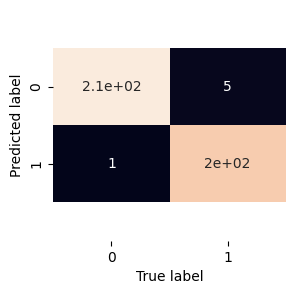

In [27]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

### Classification Report

In [31]:
target_names = [reverse_encode[y_test[0]], reverse_encode[1-y_test[0]]]
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

high incidence       1.00      0.98      0.99       218
 low incidence       0.97      0.99      0.98       196

      accuracy                           0.99       414
     macro avg       0.99      0.99      0.99       414
  weighted avg       0.99      0.99      0.99       414



### Discussion
The results for both classification and regression and both amazing. However, for the purpose of this project, we will try the following experiments:
1. Effect of removing the country feature
2. Effect of removing the year feature
3. Effect of Scaling the Data
4. Applying Feature Engineering or Not
5. Applying Feature Selection or Not; And and Without Feature Engineering